In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Replace 'plant_diseases_dataset.csv' with your actual CSV filename
data = pd.read_csv('plant_diseases_dataset.csv')

In [3]:
data.head()  # View the first few rows
data.describe()  # Get summary statistics
data['label'].value_counts()  # Count occurrences of each class label (disease type)

label
Soybean___healthy                                     2022
Apple___Apple_scab                                    2016
Orange___Haunglongbing_(Citrus_greening)              2010
Apple___healthy                                       2008
Pepper,_bell___healthy                                1988
Apple___Black_rot                                     1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                1961
Potato___Late_blight                                  1939
Potato___Early_blight                                 1939
Tomato___healthy                                      1926
Grape___Esca_(Black_Measles)                          1920
Tomato___Early_blight                                 1920
Pepper,_bell___Bacterial_spot                         1913
Corn_(maize)___Northern_Leaf_Blight                   1908
Corn_(maize)___Common_rust_                           1907
Grape___Black_rot                                     1888
Tomato___Leaf_Mold                                

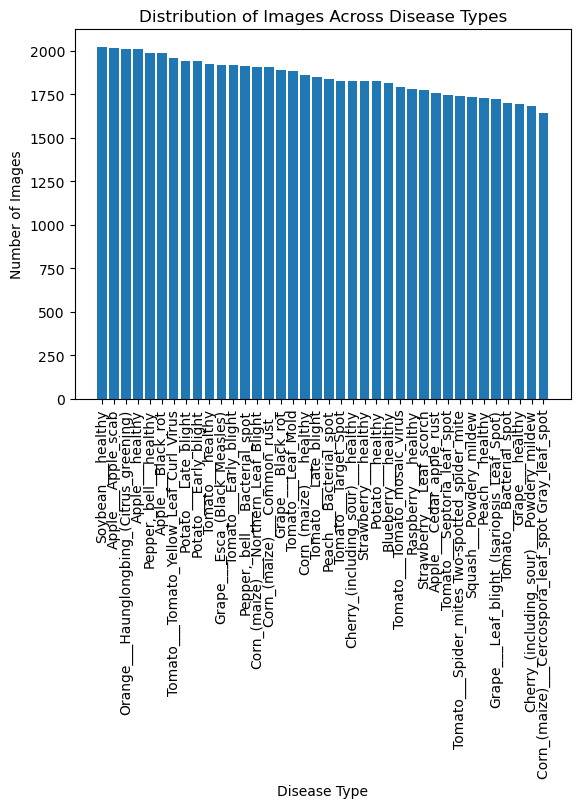

In [4]:
# Get class counts
class_counts = data['label'].value_counts()

# Create bar graph
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Disease Type")
plt.ylabel("Number of Images")
plt.title("Distribution of Images Across Disease Types")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

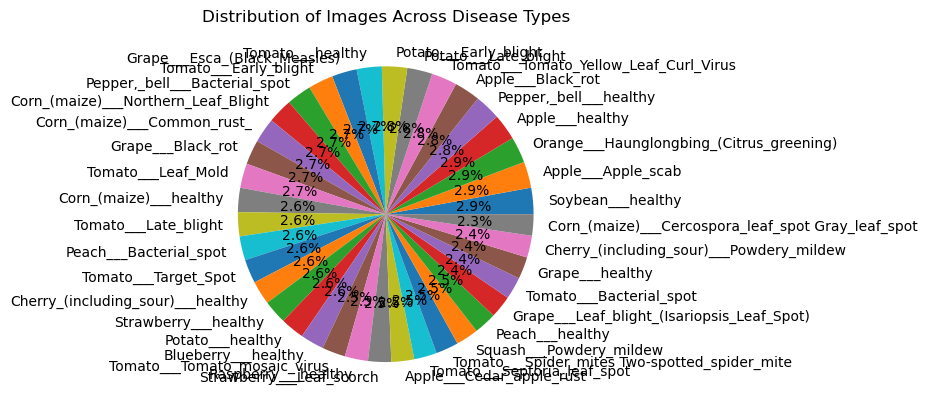

In [5]:
plt.pie(class_counts.values, labels=class_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Images Across Disease Types")
plt.show()

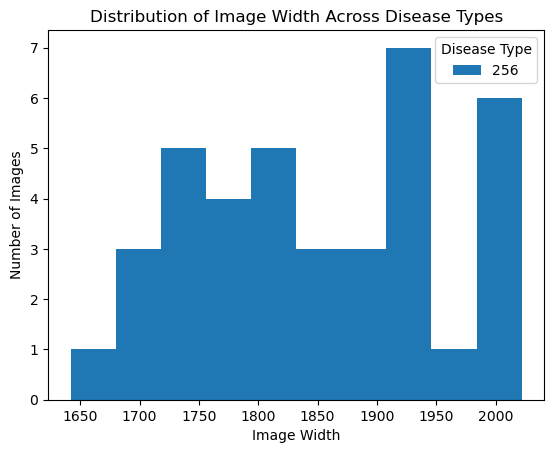

In [7]:
from PIL import Image

# Function to get image size
def get_image_size(image_path):
  try:
    img = Image.open(image_path)
    width, height = img.size
    return width, height
  except:
    # Handle potential errors (e.g., corrupted image)
    return None, None

# Create a new column for image sizes (width, height)
data['width'], data['height'] = zip(*data['image_path'].apply(get_image_size))

# Assuming width is the first element in the tuple returned by get_image_size
class_wise_width = data.groupby('label')['width'].value_counts().unstack()

# Create a histogram for image width distribution within each class
class_wise_width.plot(kind='hist', stacked=True)
plt.xlabel("Image Width")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Width Across Disease Types")
plt.legend(title='Disease Type')
plt.show()